# Script de clusterização para as bases de dados do ENEM - Algoritmo KMeans

**Autor**: Rafael Victor Araujo Bernardes - rafaelvictor.bernardes@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
# Variáveis de controle

# ano = '2019'
# ano = '2022'
# ano = '2020'
# ano = '2022'
ano = '2023'

DATASET_ENEM_PATH = 'D:\BASES_PRE_PROCESSADAS\PRE_PROCESSADOS_ENEM_' + ano + '.csv'

In [3]:
microdadosEnem = pd.read_csv(DATASET_ENEM_PATH, sep=',', encoding='ISO-8859-1')

In [4]:
microdadosEnem.shape

(2678264, 168)

In [5]:
microdadosEnem.head()

,MEDIA_NOTAS,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,...,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,MACRO_REGIAO_CENTRO_OESTE,MACRO_REGIAO_NORDESTE,MACRO_REGIAO_NORTE,MACRO_REGIAO_SUDESTE,MACRO_REGIAO_SUL
0,507.94,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,564.28,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,425.38,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,617.12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,697.66,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


### Identificando o melhor número possivel de K`s

Utilizando o método do cotovelo (Elbow Method) para determinar o valor de K 

In [6]:
aux_n_init = 1
aux_max_iter = 10

In [7]:
valores_k = []
inercias = []

colunas_para_kmeans = [col for col in microdadosEnem.columns if col not in ['MEDIA_NOTAS']]

# Percorrendo diferentes valores de k para k entre 1 e 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=aux_n_init, max_iter=aux_max_iter, random_state=72769).fit(microdadosEnem[colunas_para_kmeans])

    valores_k.append(k)
    inercias.append(kmeans.inertia_)
    print(f'{k:d}) {kmeans.inertia_}')

1) 43808605.36994996
2) 39321166.60556573
3) 37896646.69804661
4) 36858334.49456185
5) 36089798.66291453
6) 35574446.436636634
7) 35121593.893559866
8) 34931630.8924562
9) 34693535.9002419


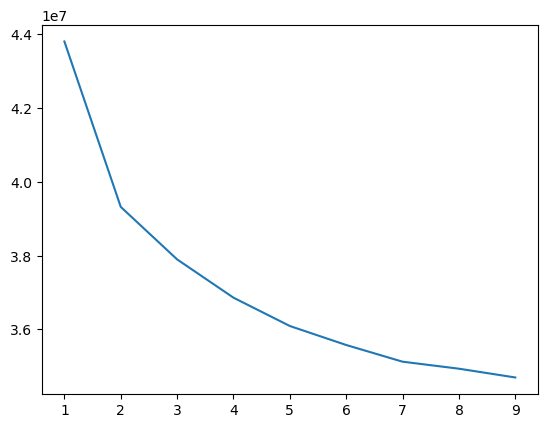

In [8]:
fig, ax = plt.subplots()

ax.plot(valores_k, inercias)

plt.show()

In [9]:
n_clusters = 5

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=aux_n_init, max_iter=aux_max_iter, random_state=72769).fit(microdadosEnem)

In [11]:
microdadosEnem['K_Cluster'] = kmeans.labels_
microdadosEnem.head()

,MEDIA_NOTAS,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,...,Q024_D,Q024_E,Q025_A,Q025_B,MACRO_REGIAO_CENTRO_OESTE,MACRO_REGIAO_NORDESTE,MACRO_REGIAO_NORTE,MACRO_REGIAO_SUDESTE,MACRO_REGIAO_SUL,K_Cluster
0,507.94,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1
1,564.28,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,1
2,425.38,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,3
3,617.12,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
4,697.66,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,4


In [12]:
# Iterando sobre as colunas e clusters

total_linhas_tabela = microdadosEnem.shape[0]

for coluna in microdadosEnem.drop('K_Cluster', axis=1).columns:
    for cluster in np.sort(microdadosEnem.K_Cluster.unique()): # 0, 1, 2, 3, ou 4

        if coluna == 'MEDIA_NOTAS':
            media = microdadosEnem.loc[microdadosEnem.K_Cluster == cluster, coluna].mean()
            print(f'{cluster:d};{coluna};{media:.4f}'.replace('.', ','))

        else:
            registros_do_cluster = microdadosEnem.loc[microdadosEnem.K_Cluster == cluster, coluna].sum()
            porcentagem = (registros_do_cluster * 100) / total_linhas_tabela
            print(f'{cluster:d};{coluna};{porcentagem:.4f}%'.replace('.', ','))
     
    
# Iterando sobre as colunas para o caso geral
for coluna in microdadosEnem.drop('K_Cluster', axis=1).columns:
    
    if coluna == 'MEDIA_NOTAS':
        media = microdadosEnem.loc[:, coluna].mean()
        print(f'All;{coluna};{media:.4f}'.replace('.', ','))

    else:
        registros_da_tabela = microdadosEnem.loc[:, coluna].sum()
        porcentagem = (registros_da_tabela * 100) / total_linhas_tabela
        print(f'All;{coluna};{porcentagem:.4f}%'.replace('.', ','))

0;MEDIA_NOTAS;609,6983
1;MEDIA_NOTAS;536,1889
2;MEDIA_NOTAS;366,5510
3;MEDIA_NOTAS;462,4746
4;MEDIA_NOTAS;696,9895
0;TP_FAIXA_ETARIA_1;3,1870%
1;TP_FAIXA_ETARIA_1;3,2933%
2;TP_FAIXA_ETARIA_1;0,7797%
3;TP_FAIXA_ETARIA_1;2,3179%
4;TP_FAIXA_ETARIA_1;1,1946%
0;TP_FAIXA_ETARIA_2;6,3338%
1;TP_FAIXA_ETARIA_2;6,9518%
2;TP_FAIXA_ETARIA_2;1,6553%
3;TP_FAIXA_ETARIA_2;5,2144%
4;TP_FAIXA_ETARIA_2;3,0238%
0;TP_FAIXA_ETARIA_3;6,1938%
1;TP_FAIXA_ETARIA_3;7,6175%
2;TP_FAIXA_ETARIA_3;2,1776%
3;TP_FAIXA_ETARIA_3;6,3629%
4;TP_FAIXA_ETARIA_3;3,1433%
0;TP_FAIXA_ETARIA_4;2,4700%
1;TP_FAIXA_ETARIA_4;3,1075%
2;TP_FAIXA_ETARIA_4;1,0157%
3;TP_FAIXA_ETARIA_4;2,7756%
4;TP_FAIXA_ETARIA_4;1,5462%
0;TP_FAIXA_ETARIA_5;1,3561%
1;TP_FAIXA_ETARIA_5;1,7837%
2;TP_FAIXA_ETARIA_5;0,5735%
3;TP_FAIXA_ETARIA_5;1,6359%
4;TP_FAIXA_ETARIA_5;0,9743%
0;TP_FAIXA_ETARIA_6;0,8609%
1;TP_FAIXA_ETARIA_6;1,1428%
2;TP_FAIXA_ETARIA_6;0,3537%
3;TP_FAIXA_ETARIA_6;1,0601%
4;TP_FAIXA_ETARIA_6;0,6423%
0;TP_FAIXA_ETARIA_7;0,6132%
1;TP_FAIXA_ETARIA

3;Q006_E;1,6100%
4;Q006_E;0,9419%
0;Q006_F;1,5263%
1;Q006_F;1,4767%
2;Q006_F;0,1990%
3;Q006_F;0,8137%
4;Q006_F;0,7339%
0;Q006_G;2,5882%
1;Q006_G;2,1606%
2;Q006_G;0,2516%
3;Q006_G;1,0748%
4;Q006_G;1,4562%
0;Q006_H;1,4663%
1;Q006_H;1,0562%
2;Q006_H;0,1169%
3;Q006_H;0,4837%
4;Q006_H;1,0001%
0;Q006_I;0,9270%
1;Q006_I;0,6173%
2;Q006_I;0,0638%
3;Q006_I;0,2629%
4;Q006_I;0,7214%
0;Q006_J;0,8403%
1;Q006_J;0,4928%
2;Q006_J;0,0491%
3;Q006_J;0,2062%
4;Q006_J;0,7148%
0;Q006_K;0,6642%
1;Q006_K;0,3770%
2;Q006_K;0,0357%
3;Q006_K;0,1477%
4;Q006_K;0,6161%
0;Q006_L;2,5848%
1;Q006_L;1,1863%
2;Q006_L;0,1144%
3;Q006_L;0,4377%
4;Q006_L;3,2918%
0;Q007_A;21,3831%
1;Q007_A;27,7886%
2;Q007_A;8,0994%
3;Q007_A;24,0608%
4;Q007_A;9,4956%
0;Q007_B;1,4881%
1;Q007_B;0,9736%
2;Q007_B;0,2721%
3;Q007_B;0,7256%
4;Q007_B;1,5935%
0;Q007_C;0,3084%
1;Q007_C;0,2110%
2;Q007_C;0,0658%
3;Q007_C;0,1677%
4;Q007_C;0,3650%
0;Q007_D;0,8674%
1;Q007_D;0,5485%
2;Q007_D;0,1606%
3;Q007_D;0,4209%
4;Q007_D;1,0045%
0;Q008_A;0,0837%
1;Q008_A;0,

All;Q006_B;29,0901%
All;Q006_C;15,4744%
All;Q006_D;11,0473%
All;Q006_E;7,8228%
All;Q006_F;4,7496%
All;Q006_G;7,5315%
All;Q006_H;4,1233%
All;Q006_I;2,5924%
All;Q006_J;2,3032%
All;Q006_K;1,8406%
All;Q006_L;7,6150%
All;Q007_A;90,8275%
All;Q007_B;5,0528%
All;Q007_C;1,1179%
All;Q007_D;3,0018%
All;Q008_A;0,8431%
All;Q008_B;63,1027%
All;Q008_C;23,9880%
All;Q008_D;7,7078%
All;Q008_E;4,3584%
All;Q009_A;0,7149%
All;Q009_B;11,7743%
All;Q009_C;49,2372%
All;Q009_D;32,4840%
All;Q009_E;5,7896%
All;Q010_A;50,2337%
All;Q010_B;38,5110%
All;Q010_C;9,7742%
All;Q010_D;1,2135%
All;Q010_E;0,2676%
All;Q011_A;75,0958%
All;Q011_B;22,0415%
All;Q011_C;2,5591%
All;Q011_D;0,2541%
All;Q011_E;0,0495%
All;Q012_A;1,6412%
All;Q012_B;92,4999%
All;Q012_C;5,3496%
All;Q012_D;0,4223%
All;Q012_E;0,0870%
All;Q013_A;53,0428%
All;Q013_B;42,9019%
All;Q013_C;3,5048%
All;Q013_D;0,4506%
All;Q013_E;0,0998%
All;Q014_A;36,0386%
All;Q014_B;62,6591%
All;Q014_C;1,2445%
All;Q014_D;0,0473%
All;Q014_E;0,0104%
All;Q015_A;86,6117%
All;Q015_B;1